In [187]:
import pandas as pd
import numpy as np

X_train=pd.read_csv('Bayes_process.csv')
X_test=pd.read_csv('Bayes_test_process.csv')

In [188]:
X_train.shape

(98592, 11)

In [189]:
X_test.shape

(42036, 11)

In [190]:
X_train.head()

,Unnamed: 0,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,0,Upper East Side,Apartment,Private room,1.0,1.0,1.0,Manhattan,low,Few,near
1,1,Washington Heights,Apartment,Private room,1.0,1.0,1.0,Manhattan,low,Few,near
2,2,Hamilton Heights,Apartment,Entire home/apt,1.0,0.0,1.0,Manhattan,low,Sufficient,near
3,3,Chinatown,Apartment,Entire home/apt,2.0,2.0,2.0,Manhattan,mid_level1,Sufficient,near
4,4,Lower East Side,Apartment,Entire home/apt,2.0,2.0,2.0,Manhattan,mid_level1,Many,near


In [191]:
X_train.drop(columns=['Unnamed: 0'],inplace=True)

In [192]:
probability=X_train['Price_class'].value_counts()
probability

low           75920
mid_level1    22093
high            579
Name: Price_class, dtype: int64

In [193]:
prob_low=probability['low']/len(X_train)

In [194]:
prob_midlevel1=probability['mid_level1']/len(X_train)

In [195]:
prob_high=probability['high']/len(X_train)

In [196]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_3 = LabelEncoder()
X_train['property_type'] = labelencoder_X_3.fit_transform(X_train['property_type'])
X_train.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,Upper East Side,0,Private room,1.0,1.0,1.0,Manhattan,low,Few,near
1,Washington Heights,0,Private room,1.0,1.0,1.0,Manhattan,low,Few,near
2,Hamilton Heights,0,Entire home/apt,1.0,0.0,1.0,Manhattan,low,Sufficient,near
3,Chinatown,0,Entire home/apt,2.0,2.0,2.0,Manhattan,mid_level1,Sufficient,near
4,Lower East Side,0,Entire home/apt,2.0,2.0,2.0,Manhattan,mid_level1,Many,near


In [197]:
labelencoder_X_3 = LabelEncoder()
X_train['room_type'] = labelencoder_X_3.fit_transform(X_train['room_type'])
X_train.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,Upper East Side,0,1,1.0,1.0,1.0,Manhattan,low,Few,near
1,Washington Heights,0,1,1.0,1.0,1.0,Manhattan,low,Few,near
2,Hamilton Heights,0,0,1.0,0.0,1.0,Manhattan,low,Sufficient,near
3,Chinatown,0,0,2.0,2.0,2.0,Manhattan,mid_level1,Sufficient,near
4,Lower East Side,0,0,2.0,2.0,2.0,Manhattan,mid_level1,Many,near


In [198]:
labelencoder_X_3 = LabelEncoder()
X_train['Amenities_class'] = labelencoder_X_3.fit_transform(X_train['Amenities_class'])
X_train.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,Upper East Side,0,1,1.0,1.0,1.0,Manhattan,low,0,near
1,Washington Heights,0,1,1.0,1.0,1.0,Manhattan,low,0,near
2,Hamilton Heights,0,0,1.0,0.0,1.0,Manhattan,low,2,near
3,Chinatown,0,0,2.0,2.0,2.0,Manhattan,mid_level1,2,near
4,Lower East Side,0,0,2.0,2.0,2.0,Manhattan,mid_level1,1,near


In [199]:
labelencoder_X_3 = LabelEncoder()
X_train['Distance_class'] = labelencoder_X_3.fit_transform(X_train['Distance_class'])
X_train.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,Upper East Side,0,1,1.0,1.0,1.0,Manhattan,low,0,1
1,Washington Heights,0,1,1.0,1.0,1.0,Manhattan,low,0,1
2,Hamilton Heights,0,0,1.0,0.0,1.0,Manhattan,low,2,1
3,Chinatown,0,0,2.0,2.0,2.0,Manhattan,mid_level1,2,1
4,Lower East Side,0,0,2.0,2.0,2.0,Manhattan,mid_level1,1,1


In [200]:
labelencoder_X_3 = LabelEncoder()
X_train['neighbourhood'] = labelencoder_X_3.fit_transform(X_train['neighbourhood'])
X_train.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,53,0,1,1.0,1.0,1.0,Manhattan,low,0,1
1,55,0,1,1.0,1.0,1.0,Manhattan,low,0,1
2,29,0,0,1.0,0.0,1.0,Manhattan,low,2,1
3,12,0,0,2.0,2.0,2.0,Manhattan,mid_level1,2,1
4,35,0,0,2.0,2.0,2.0,Manhattan,mid_level1,1,1


In [201]:
Y_train=X_train['Price_class']
X_train.drop(columns=['Bourough','Price_class'],inplace=True)

In [202]:
X_train.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Amenities_class,Distance_class
0,53,0,1,1.0,1.0,1.0,0,1
1,55,0,1,1.0,1.0,1.0,0,1
2,29,0,0,1.0,0.0,1.0,2,1
3,12,0,0,2.0,2.0,2.0,2,1
4,35,0,0,2.0,2.0,2.0,1,1


In [203]:
Y_train=pd.DataFrame(Y_train,columns=['Price_class'])

In [204]:
labelencoder_X_3 = LabelEncoder()
Y_train['Price_class'] = labelencoder_X_3.fit_transform(Y_train['Price_class'])
Y_train.head()

,Price_class
0,1
1,1
2,1
3,2
4,2


In [205]:
labelencoder_X_3 = LabelEncoder()
X_test['property_type'] = labelencoder_X_3.fit_transform(X_test['property_type'])
X_test.head()

,Unnamed: 0,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,0,Astoria,10,Private room,1.0,1.0,1.0,Queens,low,Many,far
1,1,Astoria,10,Private room,1.0,1.0,1.0,Queens,low,Many,far
2,2,Astoria,10,Private room,1.0,1.0,1.0,Queens,low,Many,far
3,3,Astoria,10,Private room,1.0,1.0,1.0,Queens,low,Many,far
4,4,Astoria,0,Entire home/apt,1.0,2.0,2.0,Queens,low,Many,far


In [206]:
labelencoder_X_3 = LabelEncoder()
X_test['room_type'] = labelencoder_X_3.fit_transform(X_test['room_type'])
X_test.head()

,Unnamed: 0,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,0,Astoria,10,1,1.0,1.0,1.0,Queens,low,Many,far
1,1,Astoria,10,1,1.0,1.0,1.0,Queens,low,Many,far
2,2,Astoria,10,1,1.0,1.0,1.0,Queens,low,Many,far
3,3,Astoria,10,1,1.0,1.0,1.0,Queens,low,Many,far
4,4,Astoria,0,0,1.0,2.0,2.0,Queens,low,Many,far


In [207]:
labelencoder_X_3 = LabelEncoder()
X_test['Amenities_class'] = labelencoder_X_3.fit_transform(X_test['Amenities_class'])
X_test.head()

,Unnamed: 0,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,0,Astoria,10,1,1.0,1.0,1.0,Queens,low,1,far
1,1,Astoria,10,1,1.0,1.0,1.0,Queens,low,1,far
2,2,Astoria,10,1,1.0,1.0,1.0,Queens,low,1,far
3,3,Astoria,10,1,1.0,1.0,1.0,Queens,low,1,far
4,4,Astoria,0,0,1.0,2.0,2.0,Queens,low,1,far


In [208]:
labelencoder_X_3 = LabelEncoder()
X_test['Distance_class'] = labelencoder_X_3.fit_transform(X_test['Distance_class'])
X_test.head()

,Unnamed: 0,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,0,Astoria,10,1,1.0,1.0,1.0,Queens,low,1,0
1,1,Astoria,10,1,1.0,1.0,1.0,Queens,low,1,0
2,2,Astoria,10,1,1.0,1.0,1.0,Queens,low,1,0
3,3,Astoria,10,1,1.0,1.0,1.0,Queens,low,1,0
4,4,Astoria,0,0,1.0,2.0,2.0,Queens,low,1,0


In [209]:
labelencoder_X_3 = LabelEncoder()
X_test['neighbourhood'] = labelencoder_X_3.fit_transform(X_test['neighbourhood'])
X_test.head()

,Unnamed: 0,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Bourough,Price_class,Amenities_class,Distance_class
0,0,0,10,1,1.0,1.0,1.0,Queens,low,1,0
1,1,0,10,1,1.0,1.0,1.0,Queens,low,1,0
2,2,0,10,1,1.0,1.0,1.0,Queens,low,1,0
3,3,0,10,1,1.0,1.0,1.0,Queens,low,1,0
4,4,0,0,0,1.0,2.0,2.0,Queens,low,1,0


In [210]:
X_test['Price_class'].value_counts()

low           32098
mid_level1     9683
high            255
Name: Price_class, dtype: int64

In [211]:
Y_test=pd.DataFrame(X_test['Price_class'],columns=['Price_class'])
X_test.drop(columns=['Bourough','Price_class','Unnamed: 0'],inplace=True)

In [212]:
X_train.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Amenities_class,Distance_class
0,53,0,1,1.0,1.0,1.0,0,1
1,55,0,1,1.0,1.0,1.0,0,1
2,29,0,0,1.0,0.0,1.0,2,1
3,12,0,0,2.0,2.0,2.0,2,1
4,35,0,0,2.0,2.0,2.0,1,1


In [213]:
Y_train.head()

,Price_class
0,1
1,1
2,1
3,2
4,2


In [214]:
labelencoder_X_3 = LabelEncoder()
Y_test['Price_class'] = labelencoder_X_3.fit_transform(Y_test['Price_class'])
labelencoder_X_3.classes_

array(['high', 'low', 'mid_level1'], dtype=object)

In [215]:
X_test.head()

,neighbourhood,property_type,room_type,bathrooms,bedrooms,beds,Amenities_class,Distance_class
0,0,10,1,1.0,1.0,1.0,1,0
1,0,10,1,1.0,1.0,1.0,1,0
2,0,10,1,1.0,1.0,1.0,1,0
3,0,10,1,1.0,1.0,1.0,1,0
4,0,0,0,1.0,2.0,2.0,1,0


In [216]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

# Train the model using the training sets 
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          Y_test.shape[0],
          (Y_test["Price_class"] != y_pred).sum(),
          100*(1-(Y_test["Price_class"] != y_pred).sum()/Y_test.shape[0])
))

accuracy=100*(1-(Y_test["Price_class"] != y_pred).sum()/Y_test.shape[0])
misclassify=1-accuracy

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of mislabeled points out of a total 42036 points : 9908, performance 76.43%


In [217]:
Y_pred=pd.DataFrame(y_pred,columns=['Predicted'])

In [218]:
Y_pred['Predicted'].value_counts()

1    37476
2     2400
0     2160
Name: Predicted, dtype: int64

In [219]:
Y_test['Price_class'].value_counts()

1    32098
2     9683
0      255
Name: Price_class, dtype: int64

In [220]:
from sklearn.metrics import confusion_matrix
array=confusion_matrix(Y_test['Price_class'], Y_pred['Predicted'])
array

array([[   97,    95,    63],
       [ 1228, 30282,   588],
       [  835,  7099,  1749]], dtype=int64)

In [221]:
Y=dict()
Y['low']=32098
Y['high']=255
Y['medium']=9683

In [222]:
Y_pred=dict()
Y_pred['low']=37476
Y_pred['high']=2160
Y_pred['medium']=9683

In [223]:
import seaborn as sn

In [224]:
df_cm = pd.DataFrame(array, index = [i for i in ['high','low','medium']],
                  columns = [i for i in ['high','low','medium']])

In [248]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=20)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45,fontsize=20)
        plt.yticks(tick_marks, target_names,fontsize=20)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=30,
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=30,
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass),fontsize=20)
    plt.show()

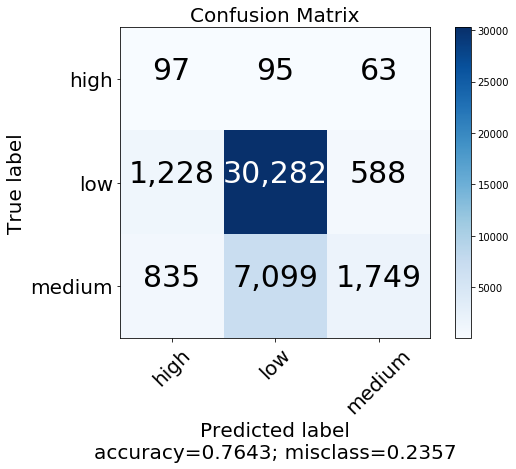

In [249]:
plot_confusion_matrix(cm= np.array([[   97,    95,    63],[ 1228, 30282,   588],[  835,  7099,  1749]]),
                      normalize    = False,
                      target_names = ['high', 'low', 'medium'],
                      title        = "Confusion Matrix")

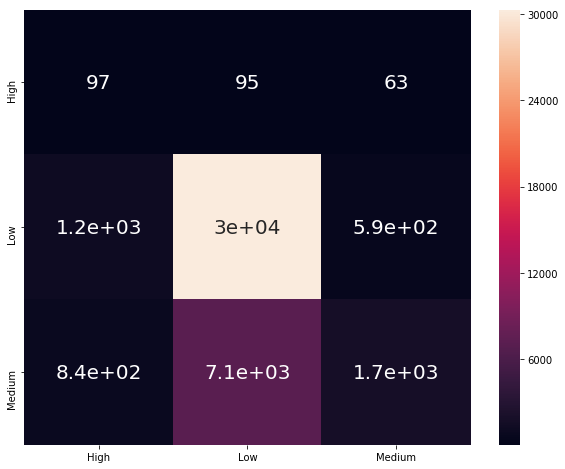

In [233]:
df_cm = pd.DataFrame(array, index = [i for i in ["High","Low","Medium"]],
                  columns = [i for i in ["High","Low","Medium"]])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})